In [1]:
# Importamos paquetes
import pandas as pd
import matplotlib.pyplot as plt

A finales de enero del año pasado, teníamos una media de aproximadamente 217 casos nuevos a la semana. Solo diez días bastaron para prácticamente duplicar dicha cifra, registrándose el 10 de enero del presente año una media de 406 casos nuevos a la semana. Incluso, el número de reproducción efectivo (R) se encuentra en 2.11 a nivel regional, lo que implica que, nuestra velocidad de crecimiento de la curva de contagios se duplicó en el mismo período (lo que significa que, en promedio, un caso positivo infecta a más de dos personas susceptibles durante su período infeccioso, lo que es grave). 

En otras palabras, Tarapacá se encuentra en una fase epidémica, con una ola de contagios producto de las fiestas de fin de año, y con una evidente fatiga pandémica (con menor cuidado de las medidas sanitarias).
Algo que destacar es que, contrastando la UCI en los primeros días del año 2021 y del año 2022, presentamos solo un 20% de los pacientes del año pasado. Esa es la importancia de incentivar la vacunación en la población.

In [2]:
# Leemos base de datos
df = pd.read_csv('../../site/csv/numeralab.csv', index_col='Fecha')

In [3]:
a2022, a2021 = df[-10:], df.loc['2021-01-01':'2021-01-10']
df_completa = df.loc['2021-01-01':]

In [4]:
# En los primeros diez días del año 2020 se registraron 1604 casos nuevos, mientras que en el 2022 fueron 3464, lo que
# implica que:
## En comparación a los primeros diez días del año 2021, el año 2022
## Tarapacá aumentó en un 216% aproximadamente los casos positivos registrados. Sin embargo, contrastando la UCI en el mismo
## período, presentamos un 20% de los pacientes del año 2022. Allí radica la importancia de incentivar la vacunación
## en la población.
print(('Cifra', '2021', '2022', '% de dif.'))
'Casos nuevos' , a2021['Casos nuevos'].sum(), a2022['Casos nuevos'].sum(), a2022['Casos nuevos'].sum()/a2021['Casos nuevos'].sum()
'Pacientes UCI', a2021['UCI ocupadas por confirmados'], a2022['UCI ocupadas por confirmados']

('Cifra', '2021', '2022', '% de dif.')


('Pacientes UCI',
 Fecha
 2021-01-01     8.0
 2021-01-02     8.0
 2021-01-03     8.0
 2021-01-04     8.0
 2021-01-05     8.0
 2021-01-06     5.0
 2021-01-07    19.0
 2021-01-08    23.0
 2021-01-09    24.0
 2021-01-10    24.0
 Name: UCI ocupadas por confirmados, dtype: float64,
 Fecha
 2022-01-30    16.0
 2022-01-31    16.0
 2022-02-01    19.0
 2022-02-02    23.0
 2022-02-03    24.0
 2022-02-04    24.0
 2022-02-05    24.0
 2022-02-06    23.0
 2022-02-07    22.0
 2022-02-08    21.0
 Name: UCI ocupadas por confirmados, dtype: float64)

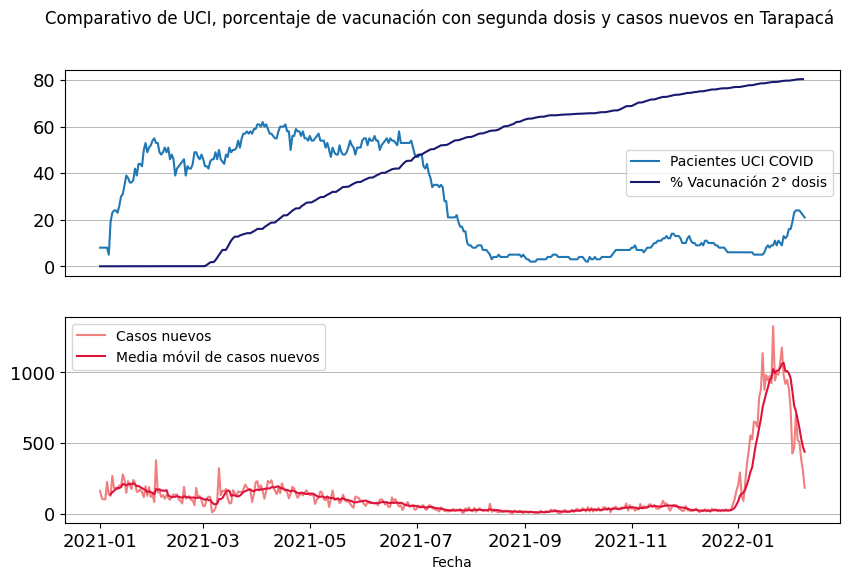

In [5]:
fig, axs = plt.subplots(2, figsize=(10, 6), dpi=100)
fig.suptitle('Comparativo de UCI, porcentaje de vacunación con segunda dosis y casos nuevos en Tarapacá')
axs[0].plot(pd.to_datetime(df_completa.index), df_completa['UCI ocupadas por confirmados'], color='tab:blue', 
         label='Pacientes UCI COVID')
axs[0].plot(pd.to_datetime(df_completa.index), (df_completa['Vacunados acumulados 2° dosis']/382773)*100, color='midnightblue', 
         label='% Vacunación 2° dosis')
axs[0].axes.get_xaxis().set_visible(False)
axs[1].plot(pd.to_datetime(df_completa.index), df_completa['Casos nuevos'], color='lightcoral', 
         label='Casos nuevos')
axs[1].plot(pd.to_datetime(df_completa.index), df_completa['Casos nuevos'].rolling(7).mean(), color='crimson', 
         label='Media móvil de casos nuevos')
axs[0].legend(), axs[1].legend()
axs[1].tick_params(axis='both', which='major', labelsize=13)
axs[0].tick_params(axis='both', which='major', labelsize=13)
axs[1].set_xlabel('Fecha')
fig.patch.set_facecolor('w')
axs[0].grid(color='gray', linestyle='-', linewidth=0.4, axis='y')
axs[1].grid(color='gray', linestyle='-', linewidth=0.4, axis='y')

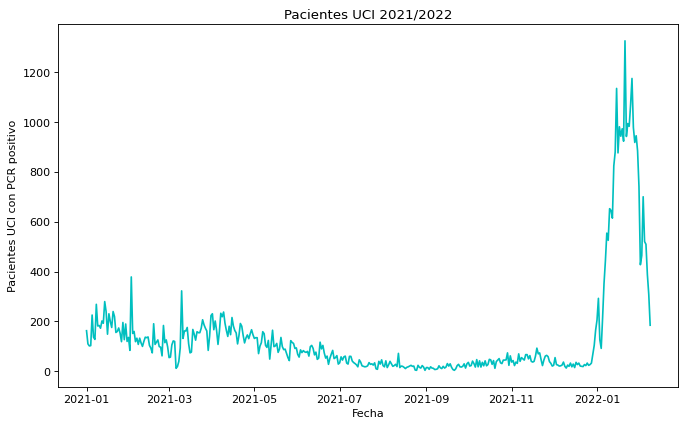

In [6]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(pd.to_datetime(df_completa.index), df_completa['Casos nuevos'], color='c', 
         label='Año 2021 sin campaña de vacunación')
plt.xlabel("Fecha")
plt.ylabel("Pacientes UCI con PCR positivo")
plt.title("Pacientes UCI 2021/2022")
plt.show()

In [7]:
df_completa['Vacunados acumulados 1° dosis'][40:]

Fecha
2021-02-10     19681.0
2021-02-11     23998.0
2021-02-12     28215.0
2021-02-13     28386.0
2021-02-14     28386.0
                ...   
2022-02-04    332403.0
2022-02-05    332439.0
2022-02-06    332439.0
2022-02-07    332635.0
2022-02-08         NaN
Name: Vacunados acumulados 1° dosis, Length: 364, dtype: float64